In [1]:
#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))

In [5]:
train = train_gen.flow_from_directory('birdDataset/train_data/',target_size=(120,120),class_mode='categorical',batch_size=8)
test = train_gen.flow_from_directory('birdDataset/test_data/',target_size=(120,120),class_mode='categorical',batch_size=8)


Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [6]:
#cnn
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [18]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 118, 118, 20)      560       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 59, 59, 20)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 69620)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                4455744   
                                                                 
 dense_7 (Dense)             (None, 16)                1040      
                                                                 
Total params: 4,457,344
Trainable params: 4,457,344
Non-trainable params: 0
____________________________________________

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
model.fit(train,batch_size=8,validation_data=test,epochs=100)

Epoch 1/100
19/19 [==============================] - 37s 2s/step - loss: 0.5860 - accuracy: 0.8533 - val_loss: 3.1205 - val_accuracy: 0.2102
Epoch 2/100
19/19 [==============================] - 36s 2s/step - loss: 0.4864 - accuracy: 0.8933 - val_loss: 3.3649 - val_accuracy: 0.2102
Epoch 3/100
19/19 [==============================] - 36s 2s/step - loss: 0.3849 - accuracy: 0.9333 - val_loss: 3.1813 - val_accuracy: 0.2102
Epoch 4/100
19/19 [==============================] - 35s 2s/step - loss: 0.2621 - accuracy: 0.9533 - val_loss: 3.1861 - val_accuracy: 0.2803
Epoch 5/100
19/19 [==============================] - 35s 2s/step - loss: 0.2233 - accuracy: 0.9667 - val_loss: 3.2878 - val_accuracy: 0.2548
Epoch 6/100
19/19 [==============================] - 36s 2s/step - loss: 0.1880 - accuracy: 0.9800 - val_loss: 3.2921 - val_accuracy: 0.2293
Epoch 7/100
19/19 [==============================] - 36s 2s/step - loss: 0.2408 - accuracy: 0.9467 - val_loss: 3.7626 - val_accuracy: 0.2803
Epoch 8/100
1

In [34]:
model.save('weightsBird1.h5')

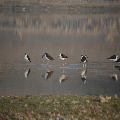

In [38]:
#testing
from tensorflow.keras.preprocessing import image
img=image.load_img(r'birdDataset\test_data\blasti\DSC_6396.jpg',target_size=(120,120))
img

In [39]:
import numpy as np
img=image.img_to_array(img)
img=np.expand_dims(img,axis=0)

In [40]:
model.predict(img)

1/1 [==============================] - 0s 29ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)